# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [30]:
import numpy as np
import pandas as pd

import sklearn

%matplotlib inline

In [31]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


Below we have plotted dataset as scatter plot depicting sepal length versus sepal width relationship between each sample of data. We also have color-encoded points according to the flower category.

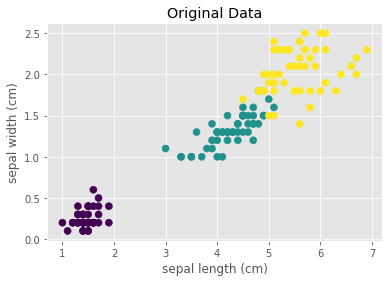

In [5]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Original Data");

We have designed a method named plot_actual_prediction_iris for plotting which can be used to compare original image labels and labels predicted by DBSCAN. It can help us analyze the performance of the DBSCAN algorithm. It accepts original data, labels, and predicted labels. It then plots original data color-encoded according to the original cluster label and original data color-encoded according to predicted(DBSCAN) cluster labels. We'll be using this method repetitively.

In [6]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Clustering Algorithm Prediction");

### Fitting DBSCAN on IRIS Data with Default Parameters

In [7]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

Y_preds = db.fit_predict(X)

Y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualizing Clustering Results

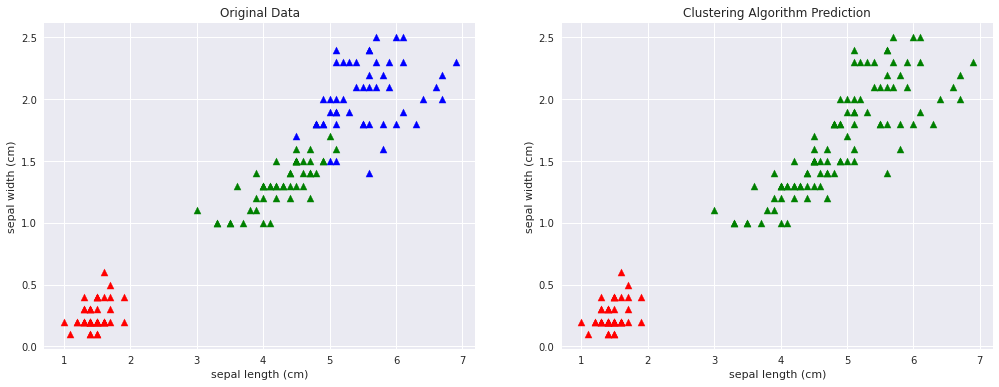

In [8]:
plot_actual_prediction_iris(X, Y, Y_preds)

## Evaluating Performance of DBSCAN

We'll be using the adjusted_rand_score method for measuring the performance of the clustering algorithm by giving original labels and predicted labels as input to the method. It tries all possible pairs of clustering labels and returns a value between -1.0 and 1.0. If the clustering algorithm has predicted labels randomly then it'll return value of 0.0. If the value of 1.0 is returned then it means that the algorithm predicted all labels correctly.

In [9]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)

0.5681159420289855

## Important Parameters of DBSCAN

Below is a list of important parameters of DBSCAN which can be tuned to improve the performance of the clustering algorithm:

- **eps** : It accepts float value specifying the radius of the cluster as discussed above during introduction. default=0.5
- **min_samples** : It accepts integer value specifying the number of neighboring samples to look to consider the sample as part of a particular cluster.default=5
- **metric** : It accepts a string or callable specifying metric to use to calculate the distance between two points. default=euclidean
- **algorithm** : It accepts string value specifying the algorithm to use for nearest neighbors to point pointwise distances and find nearest neighbors. Below is a list of possible values: auto,ball_tree,kd_tree, brute
- **leaf_size** : It accepts integer value specifying leaf size to pass to ball tree and kd tree algorithm.

# **eps=0.3, min_samples=5**

In [27]:
db = DBSCAN(eps=0.3, min_samples=5, )

Y_preds = db.fit_predict(X)

Y_preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

## Visualizing Clustering Results

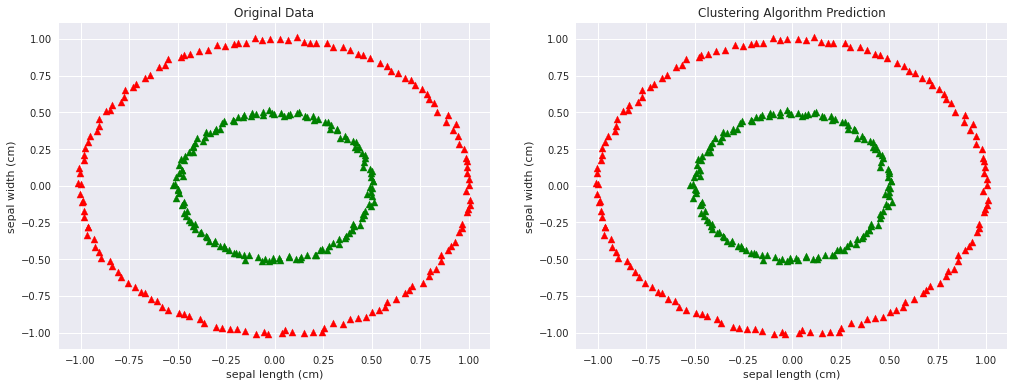

In [28]:
plot_actual_prediction_iris(X, Y, Y_preds)

## Evaluating Performance of DBSCAN

In [29]:
adjusted_rand_score(Y, Y_preds)

# **eps=0.2, min_samples=8**

In [10]:
db = DBSCAN(eps=0.2, min_samples=8, )

Y_preds = db.fit_predict(X)

Y_preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  2,  1, -1,  1,  1,  1,  1,  2,  1, -1,  1, -1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,
       -1, -1, -1, -1,  1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1,
       -1, -1,  2, -1,  2, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1,  2, -1, -1, -1,  2,  2, -1,  2])

## Visualizing Clustering Results

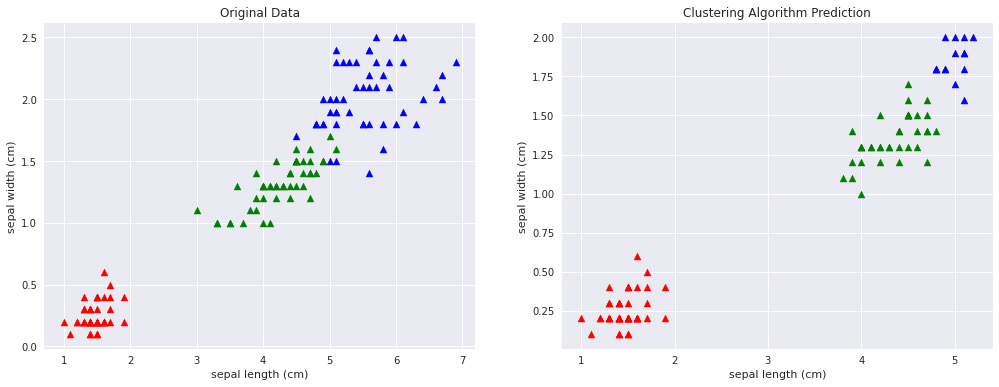

In [11]:
plot_actual_prediction_iris(X, Y, Y_preds)

## Evaluating Performance of DBSCAN

In [12]:
adjusted_rand_score(Y, Y_preds)

0.69478148725419

## Important Attributes of DBSCAN

**- core_sample_indices_** :It returns an array of indices of core samples.

**- components_** : It returns an array of size (n_core_samples, n_features) specifying copy of each core sample found by training.

In [13]:
print("Size of Core Samples : ", db.core_sample_indices_.shape)

db.core_sample_indices_[:5]

Size of Core Samples :  (75,)


array([0, 1, 2, 3, 4])

In [14]:
print("Size of Components : ", db.components_.shape)

Size of Components :  (75, 2)


## Create Moons Dataset (Two Interleaving Circles

Dataset Size :  (400, 2) (400,)


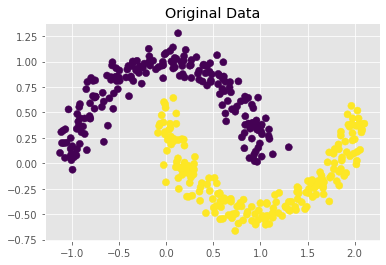

In [15]:
X, Y = datasets.make_moons(n_samples=400,
                  noise=0.09,
                  random_state=1)
print('Dataset Size : ',X.shape, Y.shape)

with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.title("Original Data");

## Trying Different Parameter Combination of DBSCAN on Data

In [16]:
def plot_actual_prediction(X,Y,Y_preds):
    with plt.style.context("ggplot"):
        plt.figure(figsize=(6,3))

        plt.subplot(1,2,1)
        plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[:,0],X[:,1], c = Y_preds , marker="o", s=50)

        plt.title("Clustering Algorithm Prediction");

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
Y_preds = db.fit_predict(X)

Y_preds



array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

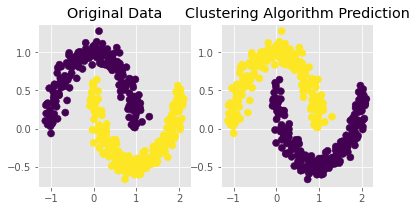

In [17]:
plot_actual_prediction(X, Y, Y_preds)

In [18]:
db = DBSCAN(eps=0.1,
            min_samples=5,
            metric='euclidean')
Y_preds = db.fit_predict(X)

Y_preds



array([ 0,  1,  2,  2,  4,  2,  3,  2,  7,  2,  4,  2,  3,  2,  2,  6,  2,
       -1,  1,  6,  1,  5,  2,  6,  7,  1,  0,  6,  2, -1,  1,  7,  4,  2,
        7,  1,  1,  1, -1,  1,  2, -1,  4,  1,  0,  1,  0,  2,  2,  2,  1,
        6, -1,  7,  2,  2,  2,  1,  2,  2,  1,  1,  5,  8,  2, -1,  1,  2,
        2, -1,  6,  1,  2,  0,  7,  2, 10,  3,  1,  5,  1,  7,  2, -1,  1,
        1,  0,  6,  0,  1,  9,  2, -1,  2,  4,  2,  2,  2,  2,  4,  1,  2,
        4,  7,  1,  2,  1,  5,  2,  8,  1,  2,  1,  5,  1,  1,  2,  5,  3,
        0, 10, -1,  0,  6,  2,  1,  1,  7,  2,  0,  2,  2,  2,  2,  2,  2,
       -1,  1,  1,  2,  7,  4,  1,  1,  1,  1,  1,  7,  4,  7,  2,  7,  1,
       -1,  6,  2,  1, 10,  9,  6,  4,  8,  2, 11, -1, 10,  9,  5,  3,  5,
        2,  0,  2,  2,  3,  9,  2,  1,  7,  1, -1,  5,  1,  2, 11,  7,  1,
        9,  2, 10,  2,  5,  8,  1,  2, -1,  1,  2,  1,  7,  2,  1,  2,  2,
        2,  7,  7,  1,  6,  7,  2, -1,  2,  8,  2,  7,  2, -1,  2,  1,  9,
        1, 10,  5, -1,  8

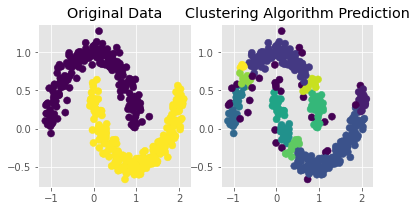

In [19]:
plot_actual_prediction(X, Y, Y_preds)

## Create Dataset Of Circles (Large Circle Containing A Smaller Circle)

Below we are creating a dataset that has one circle inside another circle. It creates a dataset with 300 samples and 2 class labels representing each circle.

We are also plotting the dataset to look at data.

Dataset Size :  (300, 2) (300,)


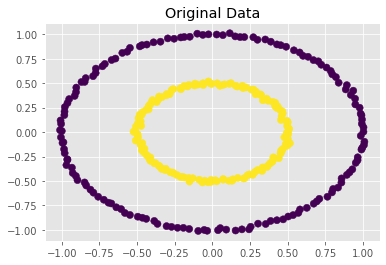

In [20]:
X, Y  = datasets.make_circles(n_samples=300, noise=0.01,factor=0.5)
print('Dataset Size : ',X.shape, Y.shape)

with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.title("Original Data");

## Trying Different Parameter Combination of DBSCAN on Data

In [21]:
db = DBSCAN(eps=0.2,
            min_samples=15,
            metric='euclidean')
Y_preds = db.fit_predict(X)

Y_preds



array([-1,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,
       -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1,
       -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,
        0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0

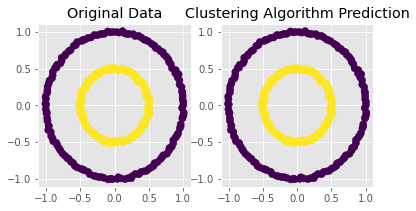

In [22]:

plot_actual_prediction(X, Y, Y_preds)

In [23]:
db = DBSCAN(eps=0.1,
            min_samples=7,
            metric='euclidean')
Y_preds = db.fit_predict(X)
Y_preds


array([-1,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,
       -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1,
       -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,
        0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0

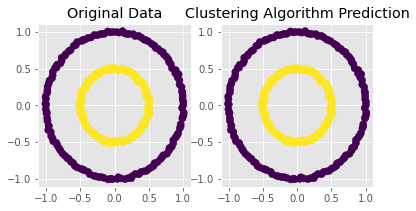

In [24]:

plot_actual_prediction(X, Y, Y_preds)

In [25]:
db = DBSCAN(eps=0.1,
            min_samples=15,
            metric='euclidean')
Y_preds = db.fit_predict(X)

Y_preds



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

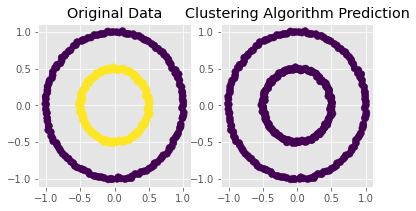

In [26]:
plot_actual_prediction(X, Y, Y_preds)